In [29]:
import numpy as np
import pandas as pd
from functions import *
from schemes import *
from plot import * 
from Kepler import *
from adaptive import * 

In [30]:
# gravity
G = 1

# mass ratio & eccentricity 
q = 1.0 # q = m2 / m1
e = 0.01

m1 = 1 # central mass
m2 = q # orbiting mass
mu = G * (m1 + m2) 

# position
r1 = np.array([0,0.0,0.0], dtype="float64")
r2 = np.array([1,0.0,0.0], dtype="float64")

# velocity 
v1 = np.array([0,0.0,0], dtype="float64")
v2 = np.array([0,np.sqrt((1 + q)*(1 + e)),0], dtype="float64")

# create initial vectors
r0s = np.array([r1,r2])
v0s = np.array([v1,v2])
masses = np.array([m1, m2])

T = 50
h0 = 0.01

In [31]:
colours = [    "#ff7f0e",  # orange
    "#2ca02c",  # green
    "#d62728",  # red
    "#9467bd",  # purple 
    ]

schemes = [EulerCromerStep, LeapfrogStep, RK4Step, PEFRLStep]
scales = np.array([0.016116201931653, 0.17225917601156848, 0.3484490170519283, 0.9240957161352804]) * 0.1
names = ['Symplectic Euler', 'Leapfrog', 'RK4', 'Forest-Ruth', 'Scipy']

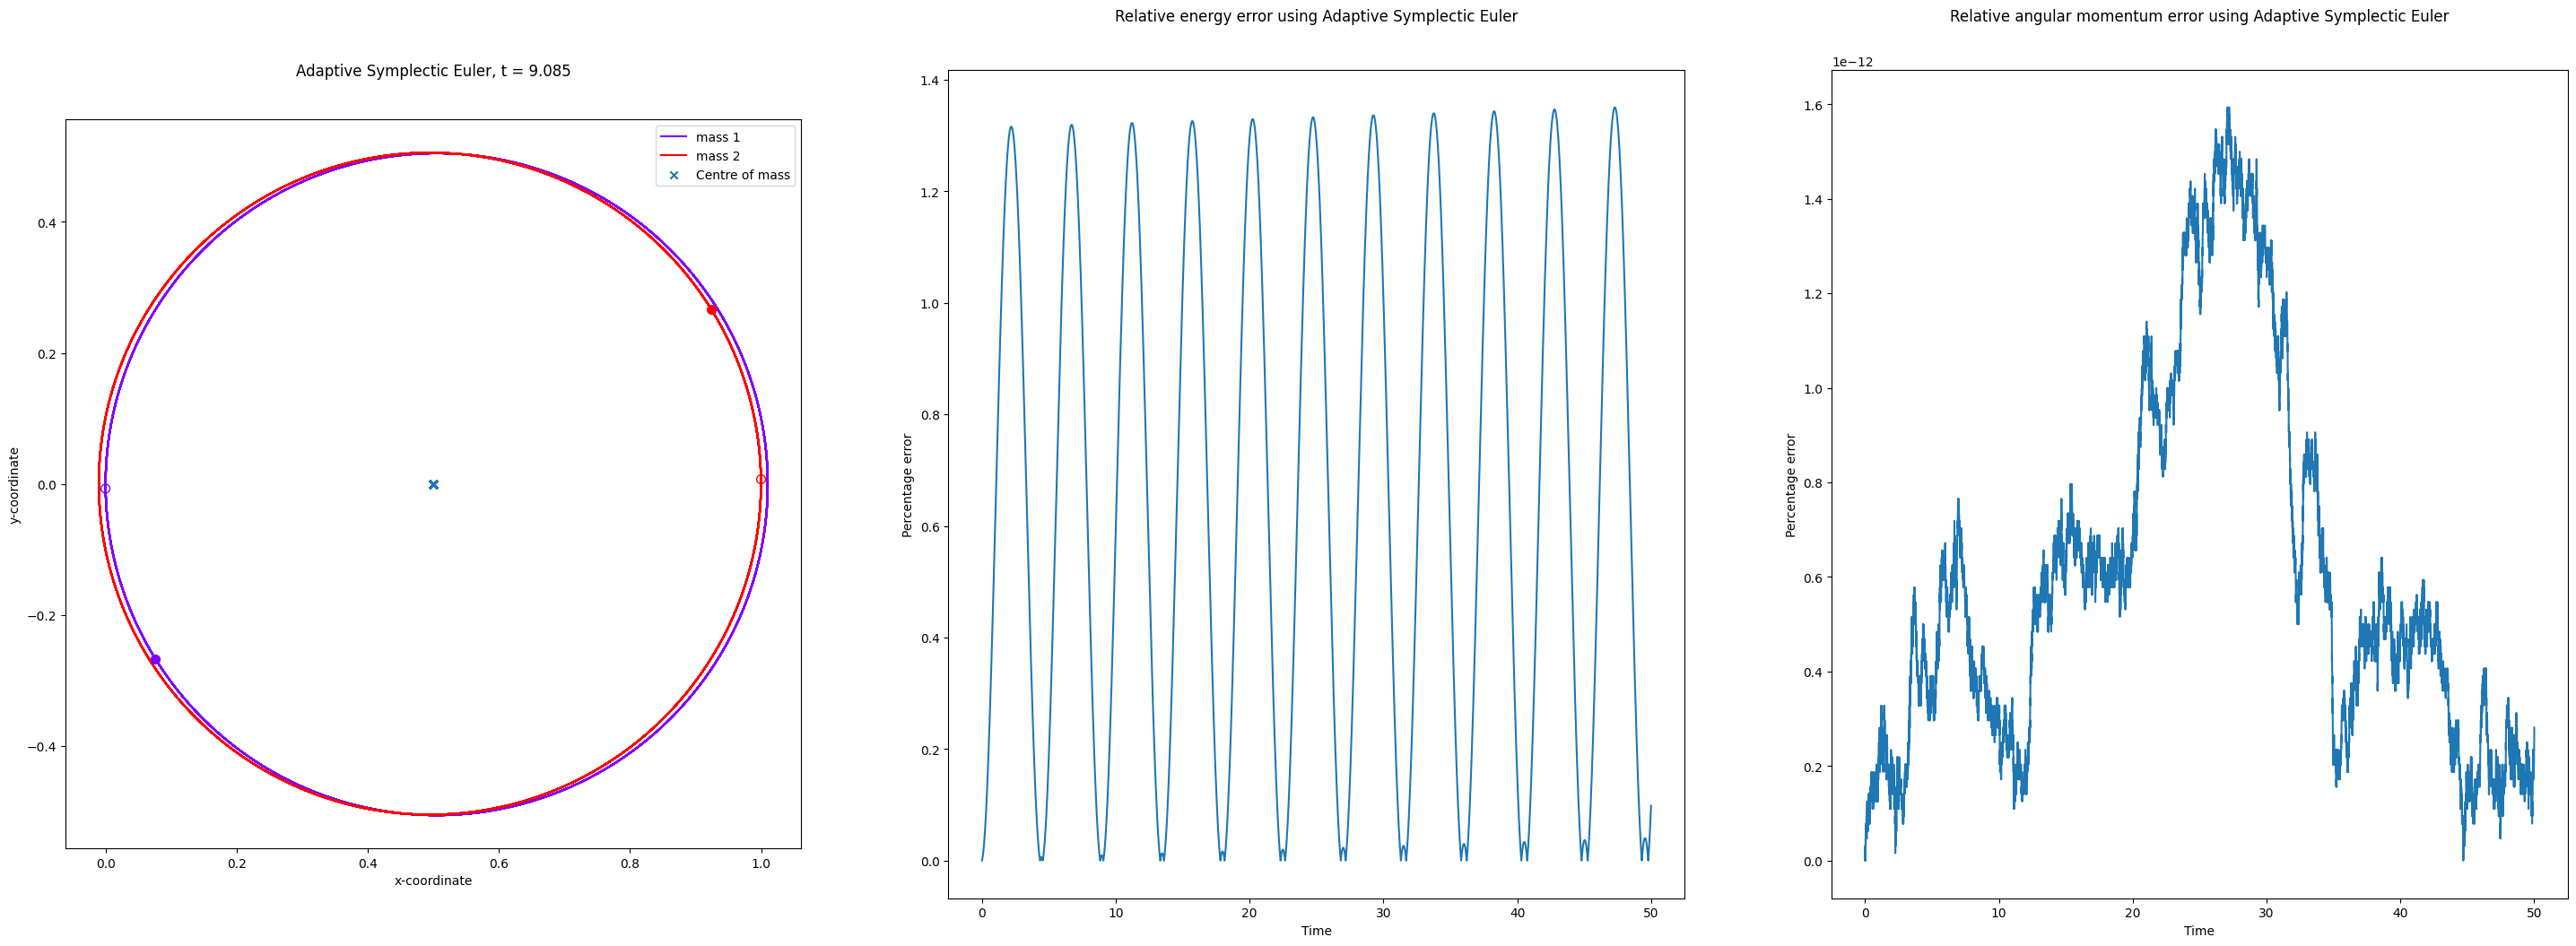

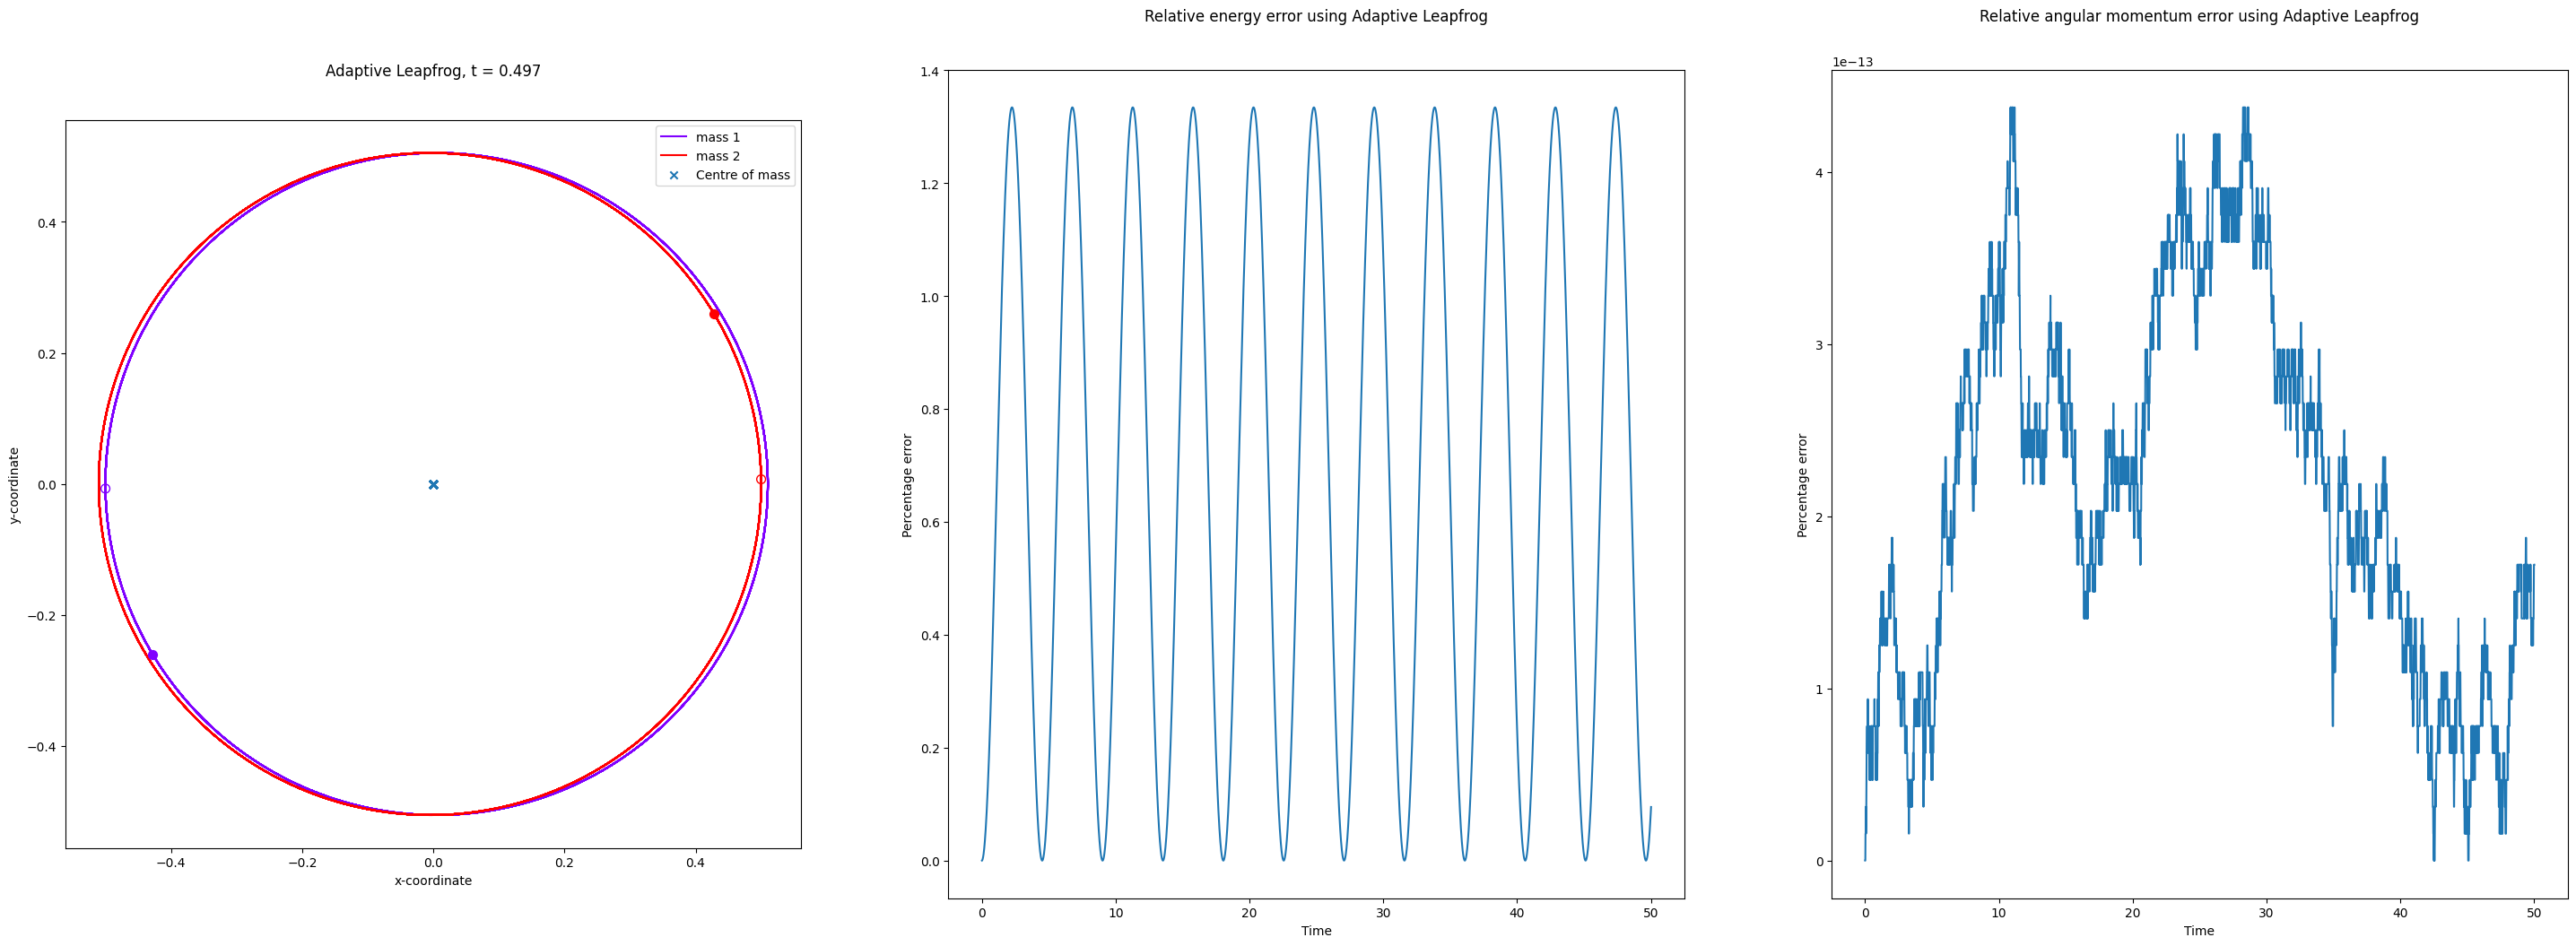

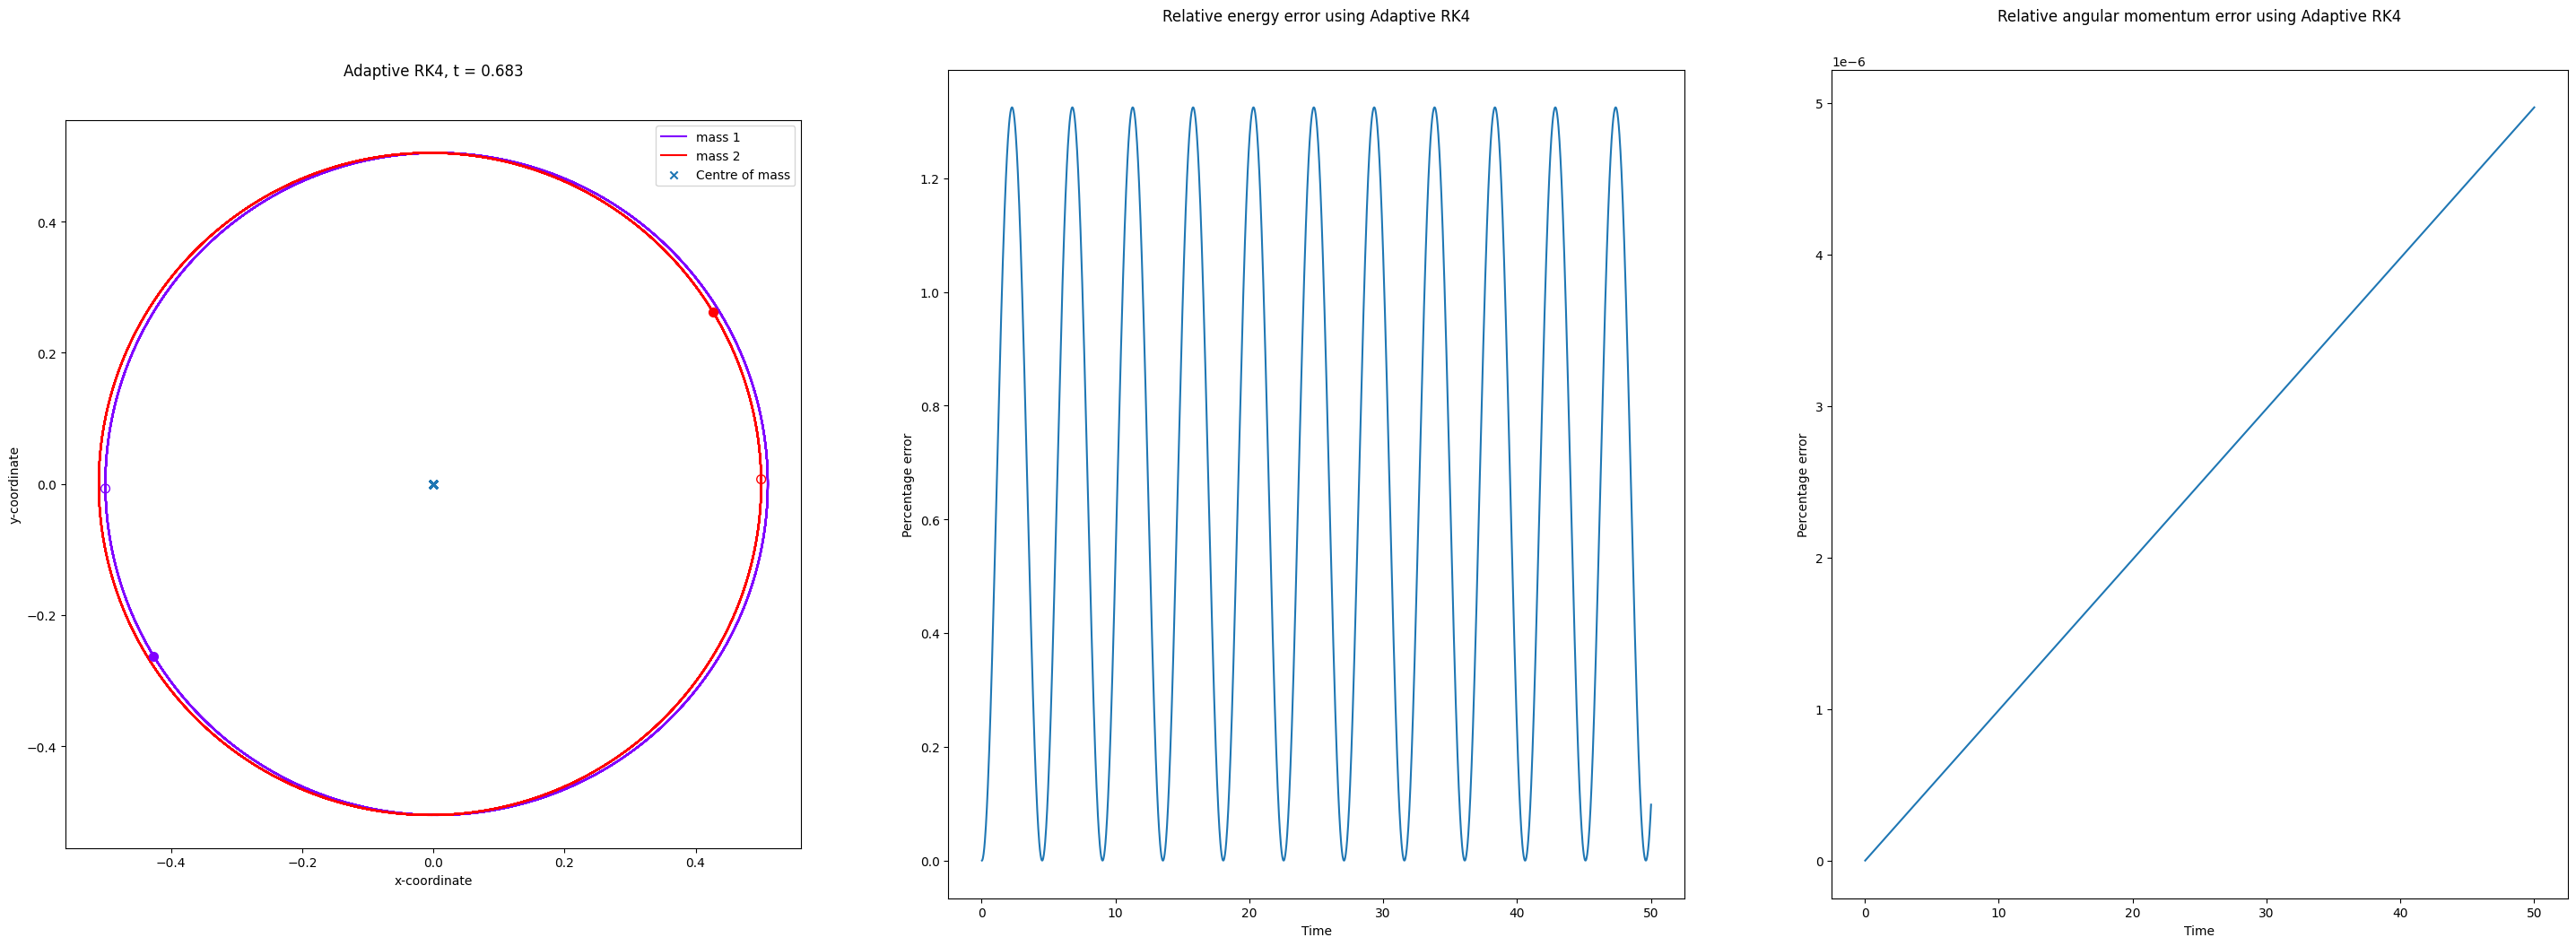

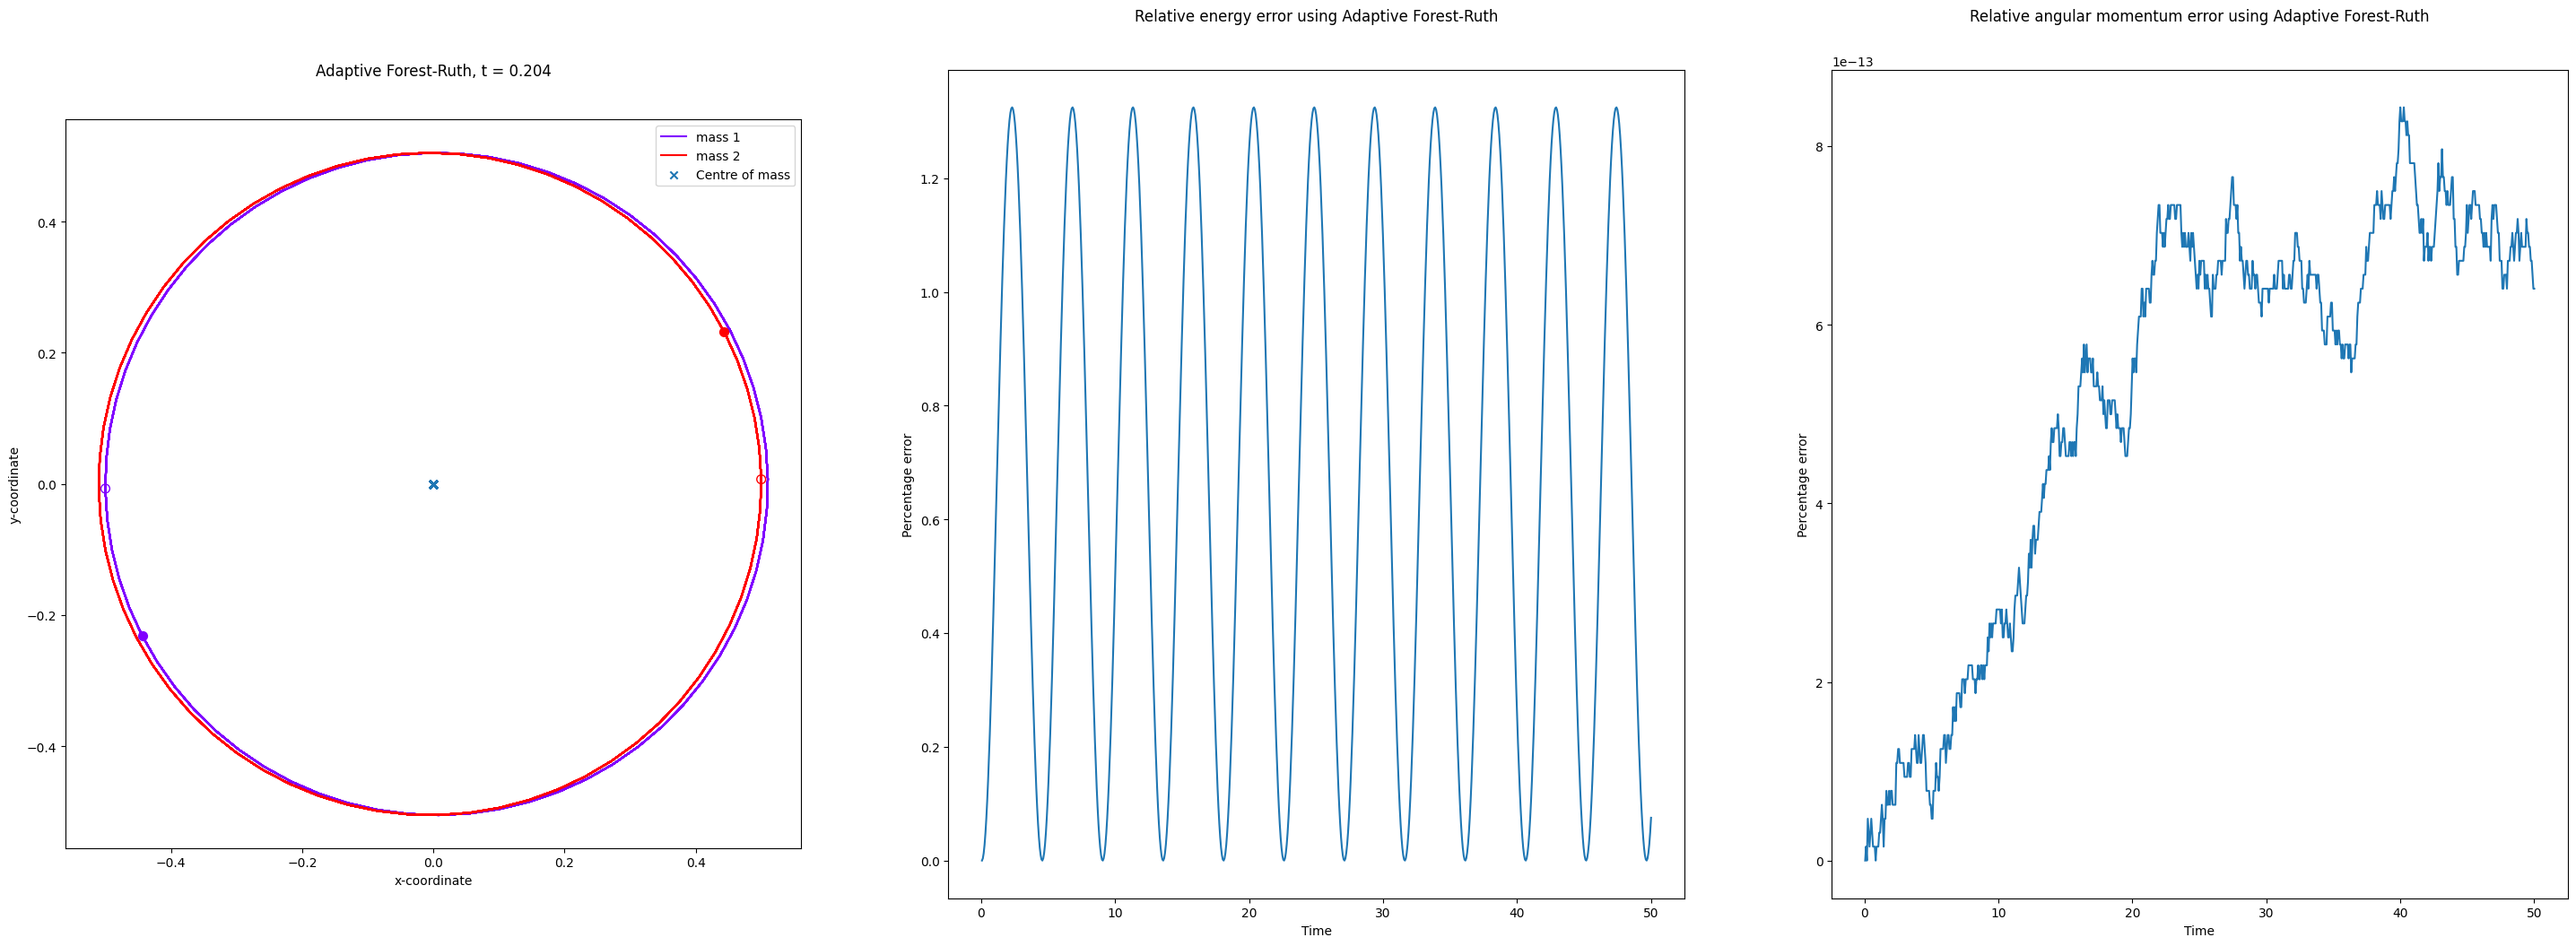

In [32]:
std_Es = []
adapt_Es = []
std_ts = []
adapt_ts = []
all_hs = []
for i, scheme in enumerate(schemes):
    adapt_traj = run_adaptive(scheme, 0, T, h0, r0s, v0s, G, masses, scaleh = scales[i])
    traj = run_scheme(scheme, 0, T, h0, r0s, v0s, G, masses)

    t_adapt = adapt_traj[0]
    t_traj = traj[0]

    std_ts.append(t_traj)
    adapt_ts.append(t_adapt)

    E_adapt = adapt_traj[3]
    E_traj = traj[3]

    rel_E_adapt = RelativeEnergy(E_adapt)
    rel_E_traj = RelativeEnergy(E_traj)

    std_Es.append(rel_E_traj)
    adapt_Es.append(rel_E_adapt)

    hs = [t_adapt[i + 1] - t_adapt[i] for i in range(len(t_adapt)-1)]
    all_hs.append(hs)

    plot2D(adapt_traj, masses, f'Adaptive {names[i]}')

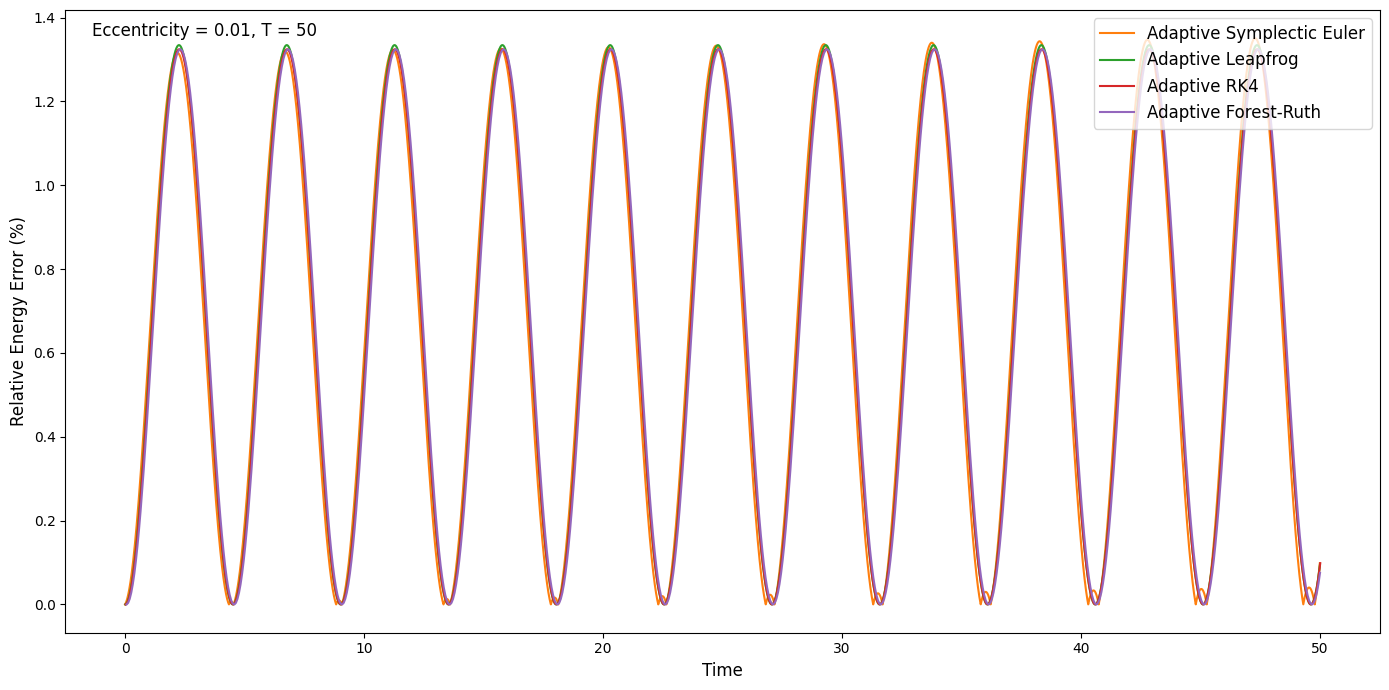

In [33]:
fig, ax = plt.subplots(1,1, figsize = (14,7))

for i, scheme in enumerate(schemes):

    std_E = std_Es[i]
    adapt_E = adapt_Es[i]
    t_std = std_ts[i]
    t_adapt = adapt_ts[i]
   # ax.plot(t_std, std_E, label = names[i], linestyle = 'dashed', color = cols[i])
    ax.plot(t_adapt, adapt_E, label = f'Adaptive {names[i]}', linestyle = 'solid', color = colours[i])

ax.text(0.02, 0.98, f'Eccentricity = {e}, T = {T}', transform=ax.transAxes, 
            va='top', fontsize = 12)
    
# ax.set_yscale('log')
ax.set_xlabel('Time', fontsize = 12)
ax.set_ylabel('Relative Energy Error (%)', fontsize = 12)
plt.legend(loc = 'upper right', fontsize=12)
plt.tight_layout()
plt.savefig(f'Plots/Adaptive/Adaptive Energy Comparison, Eccentricity={e}.pdf', format = 'pdf')